In [1]:
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from IPython.display import Image

# Создание базы данных запахов

In [2]:
#Частоты молекул в см^(-1)
fr_benzol = 674
fr_furan = 746
fr_heptanal = 2938
fr_naphthalene = 788

In [3]:
#Динамические матрицы
benzol = fr_benzol * np.array([ [2, -1, 0, 0, 0, -1],
                                [-1, 2, -1, 0, 0, 0], 
                                [0, -1, 2, -1, 0, 0], 
                                [0, 0, -1, 2, -1, 0], 
                                [0, 0, 0, -1, 2, -1],
                                [-1, 0, 0, 0, -1, 2] ])

furan = fr_furan * np.array([[2, -1, 0, 0, -1],
                             [-1, 2, -1, 0, 0],
                             [0, -1, 2, -1, 0],
                             [0, 0, -1, 2, -1],
                             [-1, 0, 0, -1, 2]])

heptanal = fr_heptanal * np.array([[1, -1, 0, 0, 0, 0, 0, 0],
                                  [-1, 2, -1, 0, 0, 0, 0, 0],
                                  [0, -1, 2, -1, 0, 0, 0, 0],
                                  [0, 0, -1, 2, -1, 0, 0, 0],
                                  [0, 0, 0, -1, 2, -1, 0, 0],
                                  [0, 0, 0, 0, -1, 2, -1, 0],
                                  [0, 0, 0, 0, 0, -1, 2, -1],
                                  [0, 0, 0, 0, 0, 0, -1, 1]])

naphthalene = fr_naphthalene * np.array([ [2, -1, 0, 0, 0, 0, 0, 0, 0, -1],
                                        [-1, 2, -1, 0, 0, 0, 0, 0, 0, 0], 
                                        [0, -1, 2, -1, 0, 0, 0, 0, 0, 0], 
                                        [0, 0, -1, 2, -1, 0, 0, 0, 0, 0], 
                                        [0, 0, 0, -1, 3, -1, 0, 0, 0, -1],
                                        [0, 0, 0, 0, -1, 2, -1, 0, 0, 0],
                                        [0, 0, 0, 0, 0, -1, 2, -1, 0, 0],
                                        [0, 0, 0, 0, 0, 0, -1, 2, -1, 0],
                                        [0, 0, 0, 0, 0, 0, 0, -1, 2, -1],
                                        [-1, 0, 0, 0, -1, 0, 0, 0, -1, 3]])

In [4]:
#Изображения молекул
im_benzol = Image(filename = 'D:\VKR\structure/benzol.png', width = 200)
im_furan = Image(filename = 'D:\VKR\structure/furan.png', width = 200)
im_heptanal = Image(filename = 'D:\VKR\structure/heptanal.png', width = 200)
im_naphthalene = Image(filename = 'D:\VKR\structure/naphthalene.png', width = 200)

In [5]:
db = [['Бензол', benzol, random_statevector(2), im_benzol],
       ['Фуран',furan, random_statevector(2), im_furan],
       ['Гептаналь',heptanal, random_statevector(2), im_heptanal],
       ['Нафталин',naphthalene, random_statevector(2), im_naphthalene]]

In [6]:
db

[['Бензол',
  array([[1348, -674,    0,    0,    0, -674],
         [-674, 1348, -674,    0,    0,    0],
         [   0, -674, 1348, -674,    0,    0],
         [   0,    0, -674, 1348, -674,    0],
         [   0,    0,    0, -674, 1348, -674],
         [-674,    0,    0,    0, -674, 1348]]),
  Statevector([-0.32387246+0.73492993j,  0.48574564+0.34501565j],
              dims=(2,)),
  <IPython.core.display.Image object>],
 ['Фуран',
  array([[1492, -746,    0,    0, -746],
         [-746, 1492, -746,    0,    0],
         [   0, -746, 1492, -746,    0],
         [   0,    0, -746, 1492, -746],
         [-746,    0,    0, -746, 1492]]),
  Statevector([-0.35260592-0.470989j  ,  0.7758341 -0.22785935j],
              dims=(2,)),
  <IPython.core.display.Image object>],
 ['Гептаналь',
  array([[ 2938, -2938,     0,     0,     0,     0,     0,     0],
         [-2938,  5876, -2938,     0,     0,     0,     0,     0],
         [    0, -2938,  5876, -2938,     0,     0,     0,     0],
      

In [7]:
pd.DataFrame(db, columns=["Название вещества","Динамическая матрица", "Вектор psi", "Изображение"])

,Название вещества,Динамическая матрица,Вектор psi,Изображение
0,Бензол,"[[1348, -674, 0, 0, 0, -674], [-674, 1348, -67...","((-0.3238724566606027+0.7349299282125518j), (0...",<IPython.core.display.Image object>
1,Фуран,"[[1492, -746, 0, 0, -746], [-746, 1492, -746, ...","((-0.3526059212919733-0.47098899848832804j), (...",<IPython.core.display.Image object>
2,Гептаналь,"[[2938, -2938, 0, 0, 0, 0, 0, 0], [-2938, 5876...","((-0.5476052285920432+0.646604893217612j), (0....",<IPython.core.display.Image object>
3,Нафталин,"[[1576, -788, 0, 0, 0, 0, 0, 0, 0, -788], [-78...","((-0.16798307493430417-0.5686808195598587j), (...",<IPython.core.display.Image object>


# Моделирование с помощью qiskit

In [8]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [9]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
teleportation_circuit.draw()

q_0: ──────────
       ┌───┐     
  q_1: ┤ H ├──■──
       └───┘┌─┴─┐
  q_2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════

In [10]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [11]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

░      ┌───┐
  q_0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
  q_1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
  q_2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════

In [12]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [13]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐   
  q_0: ───────────░───■──┤ H ├─░─┤M├───
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
  q_2: ─────┤ X ├─░────────────░──╫──╫─
            └───┘ ░            ░  ║  ║ 
crz: 1/═══════════════════════════╩══╬═
                                  0  ║ 
                                     ║ 
crx: 1/══════════════════════════════╩═
                                     0

In [14]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

In [15]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐    ░               
  q_0: ───────────░───■──┤ H ├─░─┤M├────░───────────────
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                  ║  ║       ║   ┌──╨──┐
crz: 1/═══════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                  0  ║    ┌──╨──┐└─────┘
crx: 1/══════════════════════════════╩════╡ 0x1 ╞═══════
                                     0    └─────┘

# Работа программы

<IPython.core.display.Latex object>

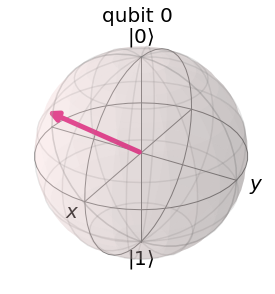

In [16]:
# Create 1-qubit state
psi = db[0][2]

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)



In [17]:
init_gate = Initialize(psi)
init_gate.label = "init"

In [18]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw()

┌──────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(-0.32387+0.73493j,0.48575+0.34502j) ├─░────────────░───■──┤ H ├»
       └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                    ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ─────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                    ░      └───┘ ░           »
crz: 1/══════════════════════════════════════════════════════════════════════»
                                                                             »
crx: 1/══════════════════════════════════════════════════════════════════════»
                                                                             »
«        ░ ┌─┐                 
«  q_0: ─░─┤M├─────────────────
«        ░ └╥┘┌─┐              
«  q_1: ─░──╫─┤M├──────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ 
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─
«        ░  ║  ║  └─╥─┘  └─╥─┘ 
«           ║  ║    ║   ┌──╨──┐
«crz: 1/════╩══╬════╬═══╡ 0x1 ╞
«           0  ║ ┌──╨──┐└─────┘
«crx: 1/═══════╩═╡ 0x1 ╞═══════
«              0 └─────┘

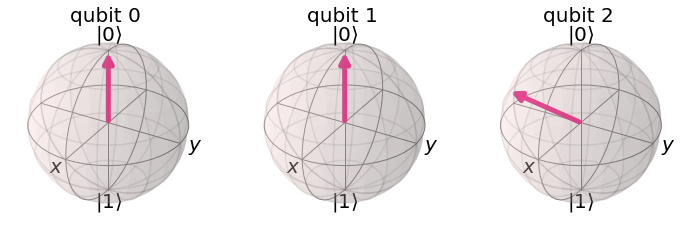

In [19]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

In [20]:
out = out_vector.data
index = []
for v in range(len(out)):
    if out[v] == ((-0+0j) and (0+0j)):
             index.append(v)
new_out = np.delete(out, index)

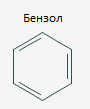

In [21]:
for k in range(len(db)):
    if (db[k][2].data.round(5) == new_out.round(5)).all():
        display(db[k][3])